<a href="https://colab.research.google.com/github/monishsai4/TensorFlow-for-NN/blob/main/TensorflowMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TensorFlow Mnist data**

**Importing all the required libraries.**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot  as plt

In [3]:
mnist = tf.keras.datasets.mnist

**Loading the file and splitting it into train and test sets.**:

In [4]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

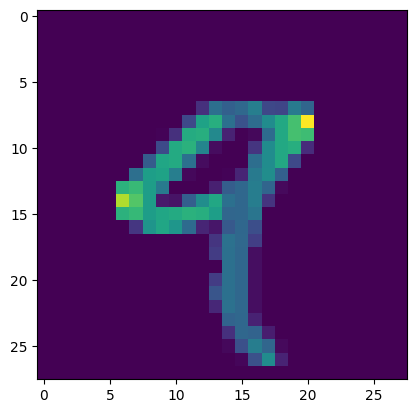

In [57]:
print(train_x[4])
plt.imshow(train_x[4])

Normalizing the data.

In [35]:
train_x = tf.keras.utils.normalize(train_x,axis=1)
test_x  = tf.keras.utils.normalize(test_x, axis=1)

**Sequential model from tensorflow**

In [36]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(128,activation = 'relu'),
        tf.keras.layers.Dense(64,activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation = 'softmax')])

Compiler using **optimizer** = 'adam',   **loss** = 'sparse_categorical_crossentropy',   **metrics** = ['accuracy']

In [37]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [38]:
model.fit(train_x,train_y,epochs = 5,batch_size = 10)

Epoch 1/5
6000/6000 [==============================] - 47s 3ms/step - loss: 0.2603 - accuracy: 0.9213
Epoch 2/5
6000/6000 [==============================] - 17s 3ms/step - loss: 0.1152 - accuracy: 0.9649
Epoch 3/5
6000/6000 [==============================] - 18s 3ms/step - loss: 0.0815 - accuracy: 0.9747
Epoch 4/5
6000/6000 [==============================] - 18s 3ms/step - loss: 0.0643 - accuracy: 0.9807
Epoch 5/5
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0524 - accuracy: 0.9831


In [39]:
y = model.predict(test_x)

313/313 [==============================] - 1s 2ms/step


In [51]:
print(y.shape)
s = np.random.randint(y.shape[0])
prediction = (np.where(y[s]==max(y[s]))[0])

(10000, 10)


predicted value = [7]


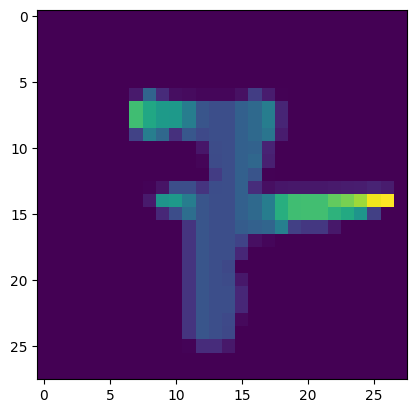

In [52]:
plt.imshow(test_x[s])
print("predicted value =",prediction)

In [93]:
score = model.evaluate(test_x, test_y, verbose=1)
score

313/313 [==============================] - 2s 5ms/step - loss: 0.0979 - accuracy: 0.9745


[0.09794776886701584, 0.9745000004768372]

**Functional Method for making a model**

In [61]:
print(train_x.shape)

(60000, 28, 28)


In [74]:
train_x = train_x.reshape(train_x.shape[0],784)

In [86]:
input_layer = tf.keras.Input(shape=(784,))
dense_layer1 = tf.keras.layers.Dense(128, activation = 'relu',name = 'layer_1')(input_layer)
dense_layer2 = tf.keras.layers.Dense(128, activation = 'relu' ,name = 'layer_2')(dense_layer1)
output_layer = tf.keras.layers.Dense(10, activation = 'softmax')(dense_layer2)
model_functional = tf.keras.Model(inputs = input_layer, outputs = output_layer)
print(model_functional.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 layer_1 (Dense)             (None, 128)               100480    
                                                                 
 layer_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
model_functional.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [88]:
print(train_y.shape)
print(train_x.shape)

(60000,)
(60000, 784)


In [89]:
model_functional.fit(train_x,train_y,epochs = 5,batch_size = 10)

Epoch 1/5
6000/6000 [==============================] - 18s 3ms/step - loss: 0.2187 - accuracy: 0.9336
Epoch 2/5
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0951 - accuracy: 0.9706
Epoch 3/5
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0653 - accuracy: 0.9794
Epoch 4/5
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0492 - accuracy: 0.9837
Epoch 5/5
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0397 - accuracy: 0.9869


In [90]:
test_x = test_x.reshape(test_x.shape[0],784)

In [91]:
y = model_functional.predict(test_x)

313/313 [==============================] - 1s 2ms/step


In [92]:
score1=model_functional.evaluate(test_x, test_y, verbose=1)
score1

313/313 [==============================] - 1s 2ms/step - loss: 0.0932 - accuracy: 0.9763


[0.0931786447763443, 0.9763000011444092]

In [101]:
%cd /content/drive/MyDrive/Colab Notebooks

[Errno 20] Not a directory: '/content/drive/MyDrive/Colab Notebooks/TensorflowMnist'
/content/drive/MyDrive/Colab Notebooks


**Saving and loading model in tensorflow**

In [114]:
model.save('mnist_model.h5')

In [105]:
!ls

'Basic F B logprop.ipynb'      submission.csv
 Datasets		       submission.xlsx
 Diabetes_pred_Logreg.ipynb    TensorflowMnist
 gender_submission.csv	       TensorflowMnist.ipynb
 kaggle.json		       Titanic_pred_Logreg.ipynb
 Logregmodelnn.ipynb	       titanic.zip
 mnist_model.model	       Untitled
 playground-series-s3e17.zip   Untitled0.ipynb


In [115]:
loaded_model = tf.keras.models.load_model('mnist_model.h5')

In [116]:
print(loaded_model)

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[1.4212972e-07 5.0116758e-11 9.4139717e-11 1.6988245e-09 5.1769344e-10
 1.8009829e-06 9.9999774e-01 1.4874107e-12 3.5341472e-07 2.7366241e-11]
predicted value =  6


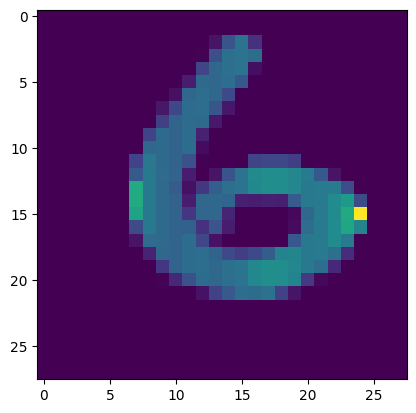

In [117]:
y_new = loaded_model.predict(test_x.reshape(test_x.shape[0],28,28))
print(y_new.shape)
num1 = np.random.randint(y_new.shape[0])
print(y_new[num1])
prediction_new = np.argmax(y_new[num1])#(np.where(y_new[num1]==max(y_new[num1]))[0])
# Visualizing the test prediction and actual val
plt.imshow(test_x.reshape(test_x.shape[0],28,28)[num1])
print("predicted value = ", prediction_new)

In [112]:
tf.saved_model.save(model_functional,'/content/drive/MyDrive/Colab Notebooks/mnist_fun_model')

In [113]:
reloaded_sm = tf.saved_model.load('mnist_fun_model')